# ACTIVIDAD INDIVIDUAL Álvaro Farreny Boixader

In [1]:
from IPython import display

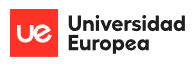

In [3]:
display.Image("logo-uem.PNG")

## Apartado A --> INPUT DE USUARIO

Cliente.py

In [ ]:
import threading
import sys
import socket
import pickle
import os

class Cliente():

	host_ = input("Escribe la ip a donde desea conectarse: ")
	puerto_ = int(input("Escriba el puerto con el que desea comunicarse: "))
    
	def __init__(self, host=host_ , port=puerto_):
		self.sock = socket.socket()
		self.sock.connect((str(host), int(port)))
		hilo_recv_mensaje = threading.Thread(target=self.recibir)
		hilo_recv_mensaje.daemon = True
		hilo_recv_mensaje.start()
		print('Hilo con PID',os.getpid())
		print('Hilos activos', threading.active_count())

		while True:
			msg = input('\nEscriba texto ? ** Enviar = ENTER ** Abandonar Chat = Q \n')
			if msg != 'Q' :
				self.enviar(msg)
			else:
				print(" **** TALOGOOO  ****")
				self.sock.close()
				sys.exit()

	def recibir(self):
		while True:
			try:
				data = self.sock.recv(32)
				if data:
					print(pickle.loads(data))
			except:
				pass

	def enviar(self, msg):
		self.sock.send(pickle.dumps(msg))

c = Cliente()

### Al iniciar el programa preguntamos al usuario por el host y el puerto al usuario. El usuario introduce su ip y su puerto y el programa les conecta al servidor si dicha ip y dicho puerto son los correctos.

In [ ]:
	host_ = input("Escribe tu ip: ")
	puerto_ = int(input("Puerto para comunicarse: "))
    
	def __init__(self, host=host_ , port=puerto_):

## Apartado B ---> NICKNAME

Cliente.py

In [ ]:
import threading
import sys
import socket
import pickle
import os

class Cliente():

	host_ = input("Escribe la ip a donde desea conectarse: ")
	puerto_ = int(input("Escriba el puerto con el que desea comunicarse: "))
	nombre = input("nickname: ")
	def __init__(self, host=host_ , port=puerto_, nickname=nombre):
		self.sock = socket.socket()
		self.sock.connect((str(host), int(port)))
		hilo_recv_mensaje = threading.Thread(target=self.recibir)
		hilo_recv_mensaje.daemon = True
		hilo_recv_mensaje.start()
		print('Hilo con PID',os.getpid())
		print('Hilos activos', threading.active_count())

		while True:
			msg = input('\nEscriba texto ? ** Enviar = ENTER ** Abandonar Chat = Q \n')
			if msg != 'Q' :
				self.enviar(nickname + "; " + msg)
			else:
				print(" **** TALOGOOO  ****")
				self.sock.close()
				sys.exit()

	def recibir(self):
		while True:
			try:
				data = self.sock.recv(32)
				if data:
					print(pickle.loads(data))
			except:
				pass

	def enviar(self, msg):
		self.sock.send(pickle.dumps(msg))

c = Cliente()

### En este caso ademas de  preguntarle por la ip y el puerto, le pedimos un nombre de usuario para identificarse en el chat.

In [ ]:
    host_ = input("Escribe la ip a donde desea conectarse: ")
	puerto_ = int(input("Escriba el puerto con el que desea comunicarse: "))
	nombre = input("nickname: ")
	def __init__(self, host=host_ , port=puerto_, nickname=nombre):

### Luego al hacer el envio del mensaje, le mandamos el nickname con el mensaje incluido despues del nickname

In [ ]:
	msg = input('\nEscriba texto ? ** Enviar = ENTER ** Abandonar Chat = Q \n')
			if msg != 'Q' :
				self.enviar(nickname + "; " + msg)

## Apartado C --> LISTA DE USUARIOS

In [ ]:
import threading
import sys
import socket
import pickle
import os

class Cliente():
    host_ = input("Escribe la ip a donde desea conectarse: ")
	port_ = int(input("Escriba el puerto con el que desea comunicarse: "))
    nick = input("Nombre de usuario: ")

    nicks = []

    def __init__(self, host=host_, port=port_, nickname=nick):
        self.sock = socket.socket()
        self.sock.connect((str(host), int(port)))
        hilo_recv_mensaje = threading.Thread(target=self.recibir)
        hilo_recv_mensaje.daemon = True
        hilo_recv_mensaje.start()
        print('Hilo con PID', os.getpid())
        print('Hilos activos', threading.active_count())
        self.enviarNick(nickname)

        while True:
            msg = input('\nEscriba texto ? ** Enviar = ENTER ** Abandonar Chat = Q \n')
            if msg != 'Q':
                self.enviar(nickname + ": " + msg)
            else:
                print(" **** TALOGOOO  ****")
                self.sock.close()
                sys.exit()

    def recibir(self):
        while True:
            try:
                data = self.sock.recv(32)
                if data:
                    print(pickle.loads(data))
            except:
                pass

    def enviar(self, msg):
        self.sock.send(pickle.dumps(msg))

    def enviarNick(self, nick_):
        self.sock.send(pickle.dumps(nick_))


c = Cliente()


cliente.py

servidor.py

In [ ]:
import socket
import threading
import sys
import pickle
import os

class Servidor():

    def __init__(self, host=socket.gethostname(), port=50000):
        self.nicks = []
        self.clientes = []
        self.sock = socket.socket()
        self.sock.bind((str(host), int(port)))
        self.sock.listen(20)
        self.sock.setblocking(False)

        aceptar = threading.Thread(target=self.aceptarC)
        procesar = threading.Thread(target=self.procesarC)

        aceptar.daemon = True
        aceptar.start()

        procesar.daemon = True
        procesar.start()

        while True:
            msg = input('SALIR = Q\n')
            if msg == 'Q':
                print("**** TALOGOOO *****")
                self.sock.close()
                sys.exit()
            elif msg == 'p':
                print(self.nicks)
            else:
                pass

    def broadcast(self, msg, cliente):
        for c in self.clientes:
            try:
                if c != cliente:
                    c.send(msg)
            except:
                self.clientes.remove(c)

    def aceptarC(self):
        while True:
            try:
                conn, addr = self.sock.accept()
                print(f"\nConexion aceptada via {conn}\n")
                conn.setblocking(False)
                self.clientes.append(conn)
            except:
                pass

    def procesarC(self):
        print("Procesamiento de mensajes iniciado")
        while True:
            if len(self.clientes) > 0:
                for c in self.clientes:
                    try:
                        data = c.recv(32)
                        if data:
                            self.broadcast(data, c)
                            if ": " not in pickle.loads(data):
                                self.nicks.append(pickle.loads(data))
                            print(pickle.loads(data))
                            
                    except:
                        pass

s = Servidor()


### Lo que hacemos en este caso es comprobar con el if ": " si lo que recibimos es un mensaje o un nombre de usuario. Cuando filtramos y hacemos la comprobacion, el nombre de usuario va directo a un array para guardarlos todos de seguido y si no es el caso el programa no guarda nada y muestra el mesnaje por pantalla al otro usuario conectado.

In [ ]:
if data:
    self.broadcast(data, c)
    if ": " not in pickle.loads(data):
        self.nicks.append(pickle.loads(data))
    print(pickle.loads(data))

### Además, si enviamos desde el servidor la letra p, nos va a mostrar dicho array con toda la gente conectada en el servidor

In [ ]:
while True:
    msg = input('SALIR = Q\n')
    if msg == 'Q':
        print("**** TALOGOOO *****")
        self.sock.close()
        sys.exit()
    elif msg == 'p':
        print(self.nicks)
    else:
        pass

## Apartado D ---> LOG

Servidor.py

In [ ]:
import socket
import threading
import sys
import pickle
import os

class Servidor():

    def __init__(self, host=socket.gethostname(), port=50000):
        self.nicks = []
        self.clientes = []
        self.sock = socket.socket()
        self.sock.bind((str(host), int(port)))
        self.sock.listen(20)
        self.sock.setblocking(False)

        aceptar = threading.Thread(target=self.aceptarC)
        procesar = threading.Thread(target=self.procesarC)

        aceptar.daemon = True
        aceptar.start()

        procesar.daemon = True
        procesar.start()

        while True:
            msg = input('SALIR = Q\n')
            if msg == 'Q':
                print("**** TALOGOOO *****")
                self.sock.close()
                sys.exit()
            elif msg == 'p':
                print(self.nicks)
            else:
                pass

    def broadcast(self, msg, cliente):
        for c in self.clientes:
            try:
                if c != cliente:
                    c.send(msg)
            except:
                self.clientes.remove(c)

    def aceptarC(self):
        while True:
            try:
                conn, addr = self.sock.accept()
                print(f"\nConexion aceptada via {conn}\n")
                conn.setblocking(False)
                self.clientes.append(conn)
            except:
                pass

    def procesarC(self):
        print("Procesamiento de mensajes iniciado")
        while True:
            if len(self.clientes) > 0:
                for c in self.clientes:
                    try:
                        data = c.recv(32)
                        if data:
                            self.broadcast(data, c)
                            if ": " not in pickle.loads(data):
                                self.nicks.append(pickle.loads(data))
                            else:
                                f = open("log-22067726.txt", "a") #la a es para activar el modo append de escritura en el fichero.
                                f.write(pickle.loads(data) + "\n")
                                f.close()
                            print(pickle.loads(data))

                    except:
                        pass

s = Servidor()



### Basicamente despues de ver que funciona correctamente los mensajes utilizamos los ficheros para escribir y crear el documento .txt donde vamos a registrar todo el log de nuestro programa. 

In [ ]:
f = open("log-22067726.txt", "a") #la a es para activar el modo append de escritura en el fichero.
f.write(pickle.loads(data) + "\n")
f.close()